In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Nyquist–Shannon sampling theorem
\begin{align}
    f(t) \; = \; \sum_{n = -\infty}^{\infty} f\big(\frac{n}{2B}\big) \; \mathrm{sinc}\Big(2B\big(t-\frac{n}{2B}\big)\Big)
\end{align}

This equality holds if $\hat{f}(\omega)$, Fourier transform of $f(t)$, is zero for $\omega > B$, $\omega < -B$.


In other words, $\hat{f}(\omega)$ is band limited with maximum frequency $B$

**The Nyquist sampling frequency is $2 \times B$**

Reference: http://www-users.math.umn.edu/~lerman/math5467/shannon_aliasing.pdf

# Numerical Test
We test this theorem using a simple signal
\begin{align}
    &f(t) \; = \;  A_{1}\sin(\omega_{1}t) \; + \; A_{2}\sin(\omega_{2}t) \\
    \implies &\hat{f}(\omega) \; \sim \; A_{1} \delta(\omega - \omega_{1}) \; + \; A_{2} \delta(\omega - \omega_{2}) 
\end{align}


We set $A_{1} = 1, \; A_{2} = 0.5, \; \omega_{1} = 1, \; \omega_{2} = 0.3$

In [2]:
def signal(t):
    return np.sin(t) + 0.5*np.sin(0.3*t)

In [3]:
def numerical_test(half_sampling_freq: float, 
                   t: np.array,
                   N_list: list,
                  ):
    signal_actual = signal(t)
    fig, axes = plt.subplots(nrows=len(N_list), ncols=2, figsize=(12, 20))

    for N, ax in zip(N_list, axes):
        signal_reco_ = 0.

        # sum over the terms
        for n in range(N):
            x_ = n/(2*B)
            signal_reco_ += signal(x_) * np.sinc(2*half_sampling_freq*(t-x_))

            if n > 0:
                signal_reco_ += signal(-x_) * np.sinc(2*half_sampling_freq*(t+x_))  # add also for negative n 

        # Plot the reconstructed & actual signal
        ax[0].plot(t, signal_reco_, label="Reconstructed")
        ax[0].plot(t, signal_actual, label="Actual")
        ax[0].legend()
        ax[0].set_title(f"N = {N}")

        # Plot also the residual
        residual = signal_reco_ - signal_actual
        ax[1].plot(t, residual, label="Residual")
        ax[1].legend()
        ax[1].set_title(f"N = {N}")

    plt.tight_layout(h_pad=2, w_pad=2)

# Test 1
\begin{align}
    f(t) \; = \;  \sin(t) \; + \; 0.5 \sin(0.3\,t)
\end{align}

\begin{align}
    f_{reco}(t) \; = \; \sum_{n = -\infty}^{\infty} f\big(\frac{n}{2B}\big) \; \mathrm{sinc}\Big(2B\big(t-\frac{n}{2B}\big)\Big)
\end{align}


Set $B = 0.1$

$B$ is way too small to capture the oscillation behvaiour succesfully even for large $N$

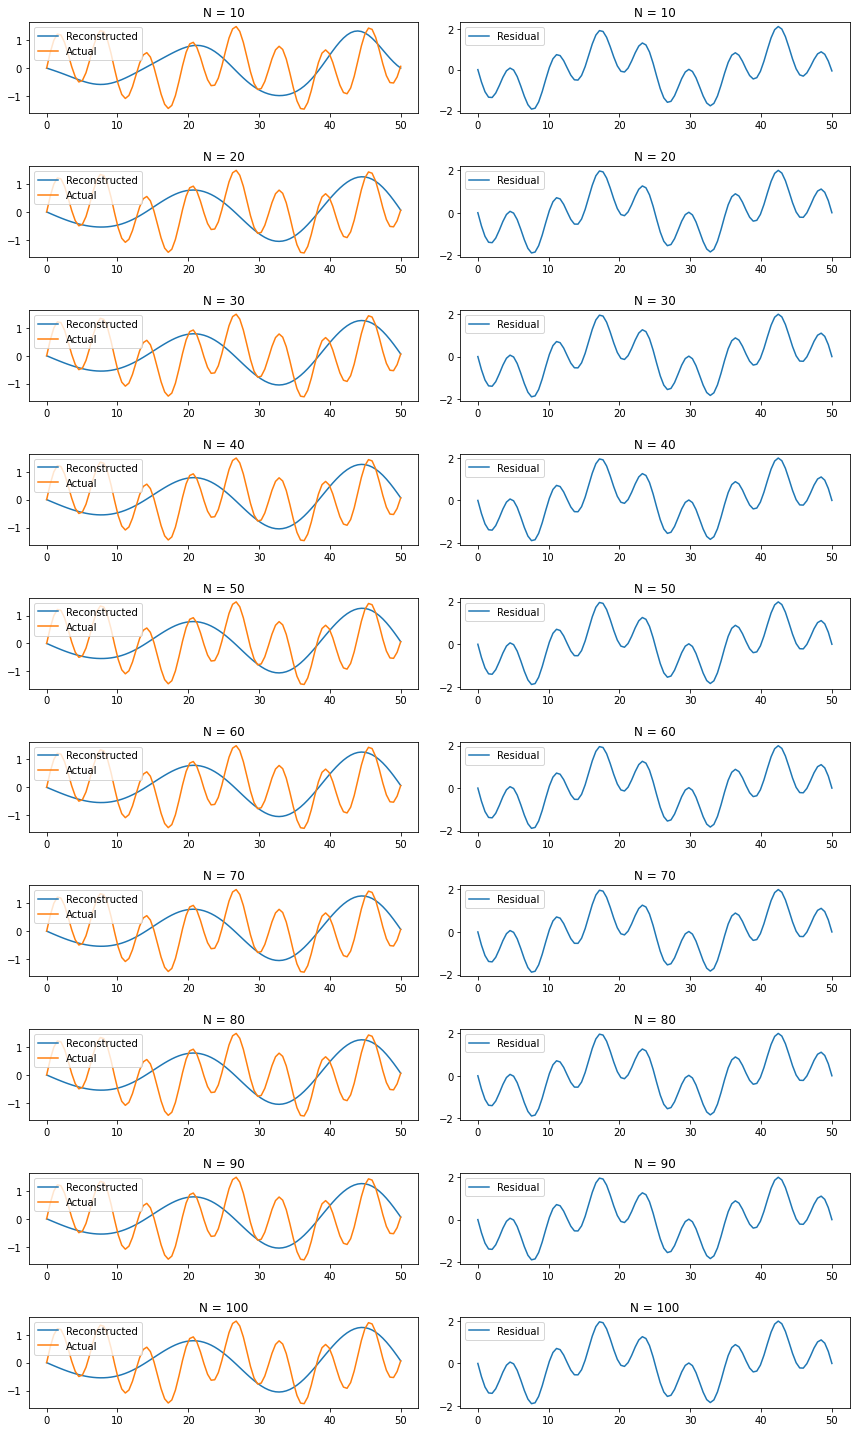

In [4]:
B = 0.1
t = np.linspace(0, 50, 100)
N_list = list(range(10, 110, 10))
numerical_test(B, t, N_list)

# Test 2
\begin{align}
    f(t) \; = \;  \sin(t) \; + \; 0.5 \sin(0.3\,t)
\end{align}


\begin{align}
    f_{reco}(t) \; = \; \sum_{n = -\infty}^{\infty} f\big(\frac{n}{2B}\big) \; \mathrm{sinc}\Big(2B\big(t-\frac{n}{2B}\big)\Big)
\end{align}


Set $B = 0.3$

$B$ matches only one of the harmonics. 

Hence, you can see that for even for large $N$, $f_{reco} - f$, the residual, is still oscillating. It shows that another harmonic is not captured successfully

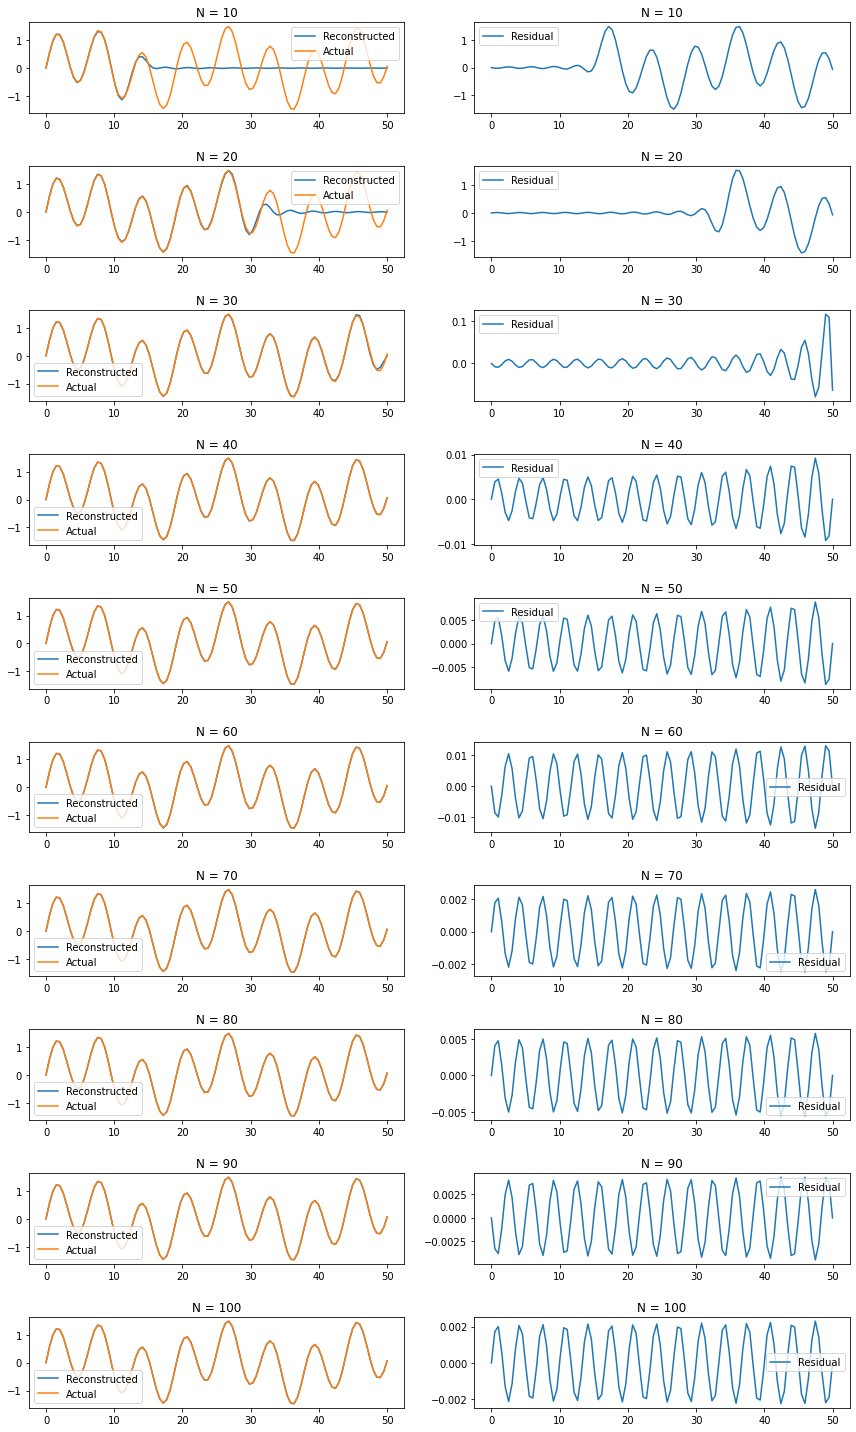

In [5]:
B = 0.3
t = np.linspace(0, 50, 100)
N_list = list(range(10, 110, 10))
numerical_test(B, t, N_list)

# Test 3
\begin{align}
    f(t) \; = \;  \sin(t) \; + \; 0.5 \sin(0.3\,t)
\end{align}


\begin{align}
    f_{reco}(t) \; = \; \sum_{n = -\infty}^{\infty} f\big(\frac{n}{2B}\big) \; \mathrm{sinc}\Big(2B\big(t-\frac{n}{2B}\big)\Big)
\end{align}


Set $B = 0.65$


$B$ is in between two harmonics. Similar to Test 2, the oscillating residual indicates that another half of harmonic is not captured

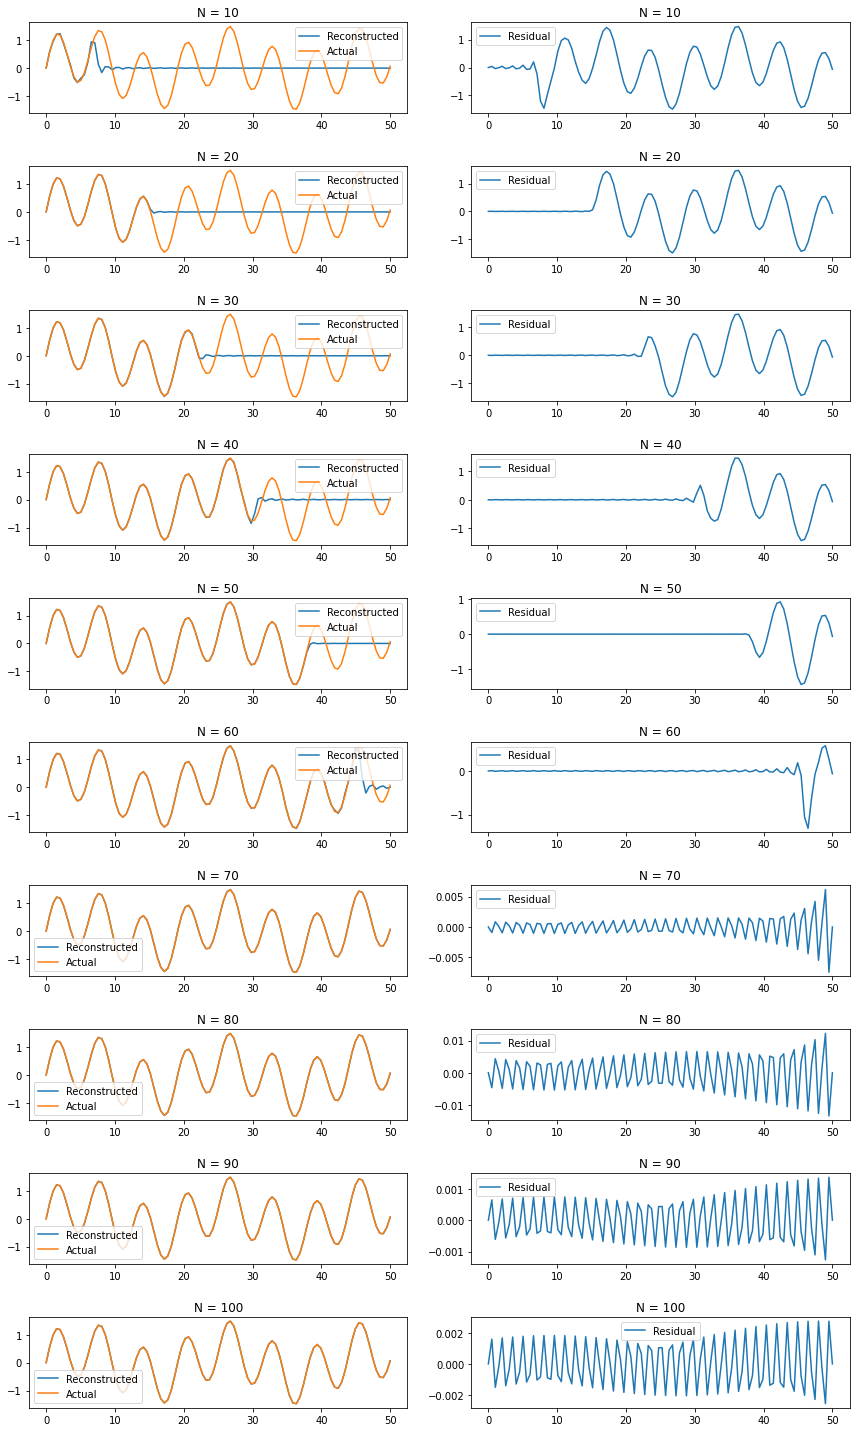

In [6]:
B = 0.65
t = np.linspace(0, 50, 100)
N_list = list(range(10, 110, 10))
numerical_test(B, t, N_list)

# Test 4
\begin{align}
    f(t) \; = \;  \sin(t) \; + \; 0.5 \sin(0.3\,t)
\end{align}


\begin{align}
    f_{reco}(t) \; = \; \sum_{n = -\infty}^{\infty} f\big(\frac{n}{2B}\big) \; \mathrm{sinc}\Big(2B\big(t-\frac{n}{2B}\big)\Big)
\end{align}


Set $B = 1$

This is the exact Nyquist sampling criteria, we see that for large $N$ the residual indeed is small.

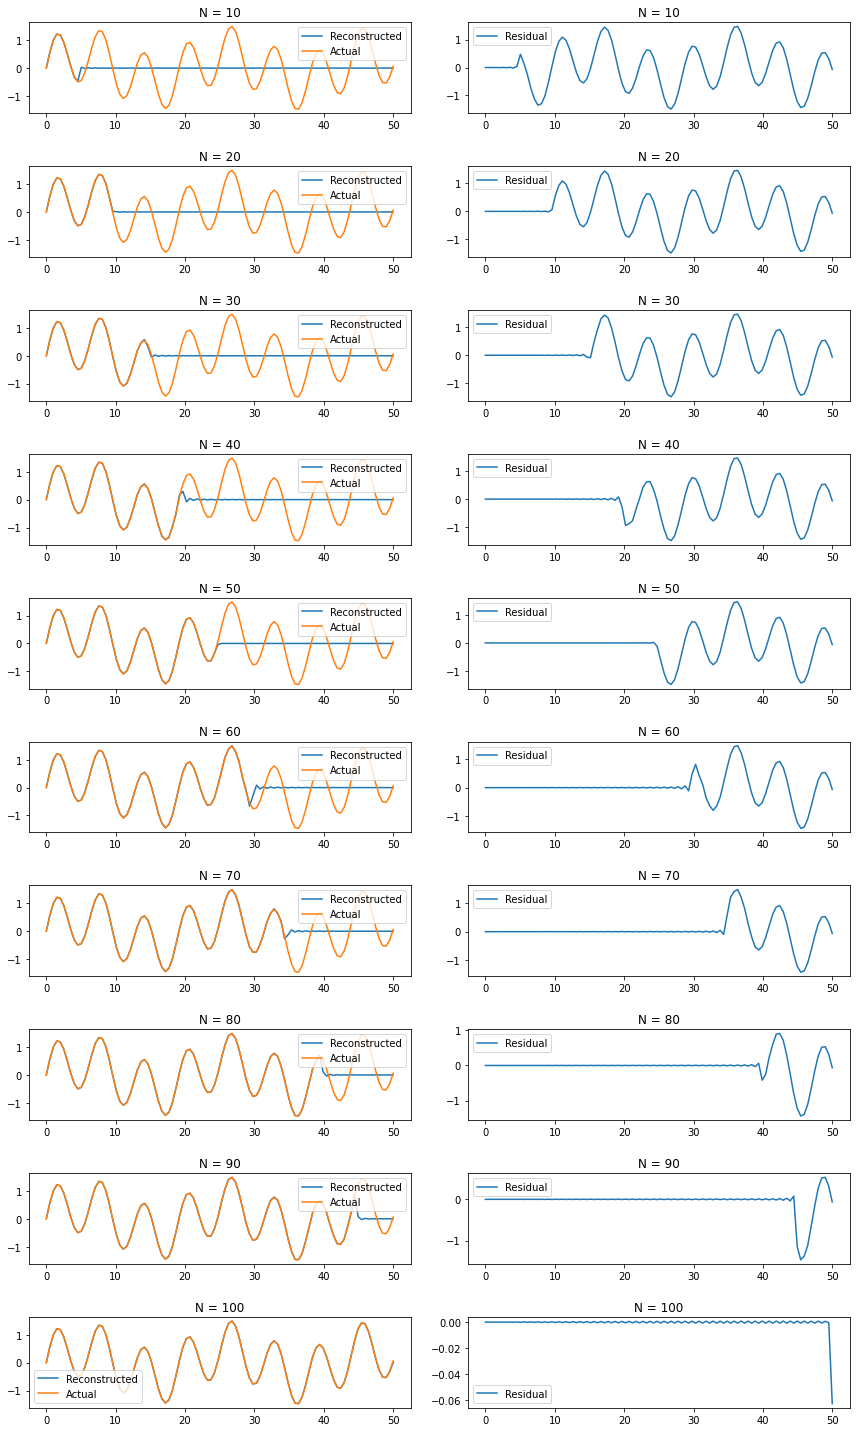

In [7]:
B = 1
t = np.linspace(0, 50, 100)
N_list = list(range(10, 110, 10))
numerical_test(B, t, N_list)

# Test 5
\begin{align}
    f(t) \; = \;  \sin(t) \; + \; 0.5 \sin(0.3\,t)
\end{align}


\begin{align}
    f_{reco}(t) \; = \; \sum_{n = -\infty}^{\infty} f\big(\frac{n}{2B}\big) \; \mathrm{sinc}\Big(2B\big(t-\frac{n}{2B}\big)\Big)
\end{align}


Set $B = 2$

<font color='red'>Don't know why it fails :( </font>

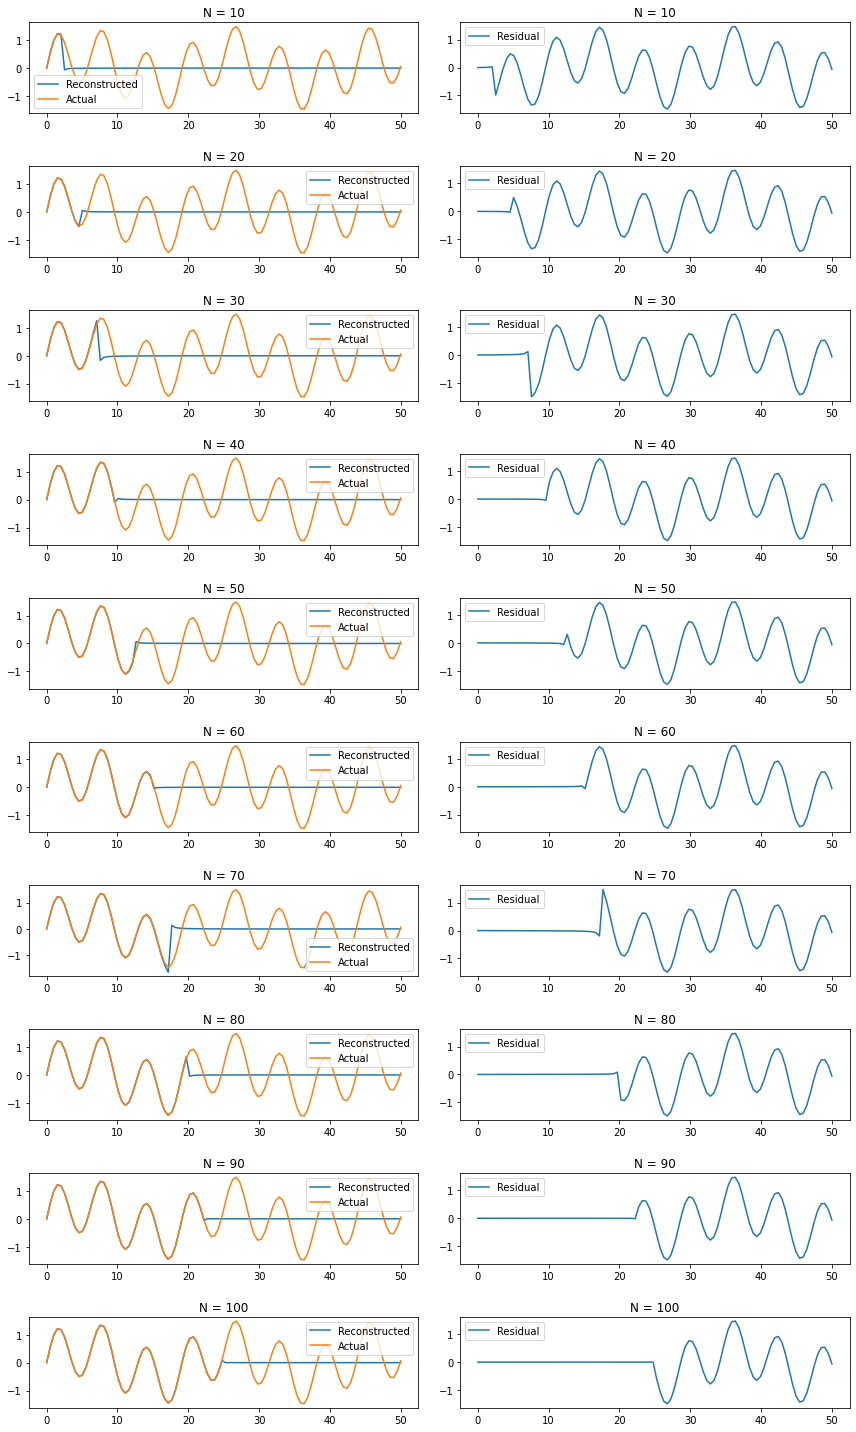

In [8]:
B = 2
t = np.linspace(0, 50, 100)
N_list = list(range(10, 110, 10))
numerical_test(B, t, N_list)